# Exercício de Análise com Pandas

## Import das bibliotecas

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


## Carregar Dataset

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### contagem de valores válidos

In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### verificar valores nulos no dataset

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Descrever principais valores de estatística do dataset

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2 - Quantas mulheres e homens haviam na embarcação? Qual o número

In [59]:
df.groupby(by=['Sex']).count()
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Total de mulheres: 314 Total de homens: 577

## 3 - Qual a porcentagem da tripulação que morreu?

In [24]:
df.groupby(by=['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [30]:
total_passageiros = 891
total_mortos = 549
porcentagem = round(((total_mortos/total_passageiros)*100), 2)
print(f'Percentual de sobreviventes: {porcentagem} %')

Percentual de sobreviventes: 61.62 %


In [36]:
homens = df[df['Sex']=='male']
homens_mortos = homens[homens['Survived']== 0]
homens_mortos.count()

PassengerId    468
Survived       468
Pclass         468
Name           468
Sex            468
Age            360
SibSp          468
Parch          468
Ticket         468
Fare           468
Cabin           62
Embarked       468
dtype: int64

#### Morreram 468 homens

## 5 - Quantas pessoas estavam no navio que eram adolescentes(entre 12 e 18 anos)?

In [53]:
adolescentes = len(df[(df['Age'] >= 12) & (df['Age'] <= 18)])
adolescentes

71

### Total de adolescentes: 71

In [66]:
homens_morreram = len(df[(df['Sex']=='male') & (df['Survived'] == 0)])
homens_morreram

468

In [68]:
mulheres_morreram = len(df[(df['Sex']=='female') & (df['Survived'] == 0)])
mulheres_morreram

81

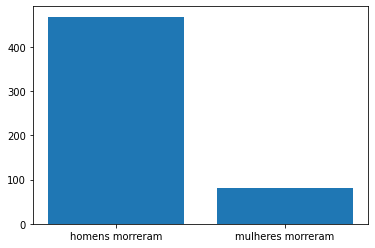

In [71]:
plt.figure()
names = ['homens morreram', 'mulheres morreram']
values = [homens_morreram, mulheres_morreram]
plt.bar(names, values)

plt.show()